In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os.path as path
import os 

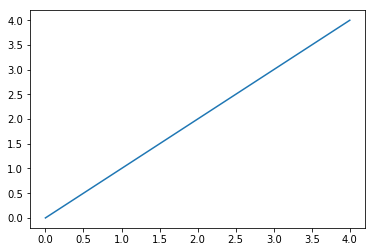

In [4]:
# PLOT function
plt.plot(np.arange(5))

[0 1 2 3 4]
[0 1 2 3 4]


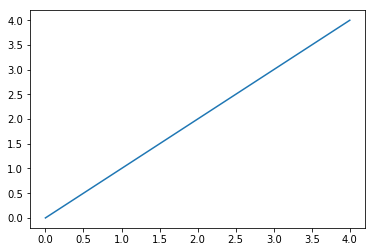

In [5]:
# Experimentation with commands
np.arange(5);
x = np.arange(5);
y = np.arange(5);
print(x)
print(y)
plt.plot(x,y)

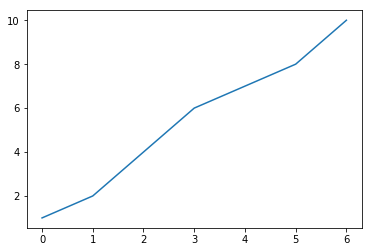

In [6]:
# Plot function
plt.plot([1,2,4,6,7,8,10])

In [7]:
# Load IRIS Data
os.getcwd()
columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
data = pd.read_csv(os.getcwd() + "\\iris.data.txt",header=None,names=columns)
data.head(10)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [8]:
# Numeric Summary of the file
data.describe();

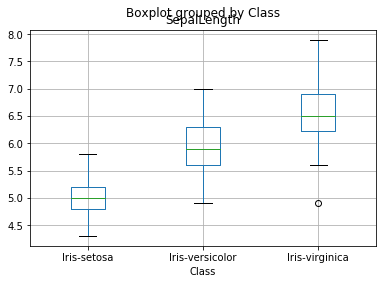

In [9]:
# Exploration of data
data.boxplot('SepalLength',by='Class')

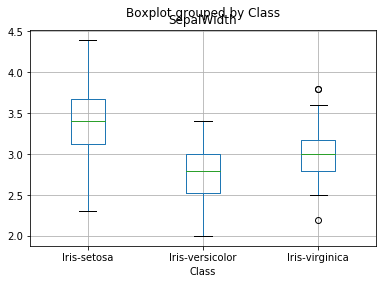

In [10]:
# Exploration of data
data.boxplot('SepalWidth',by='Class')

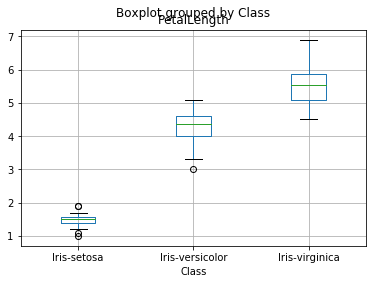

In [11]:
# Exploration of data
data.boxplot('PetalLength',by='Class')

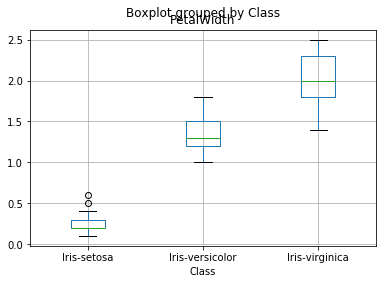

In [12]:
# Exploration of data
data.boxplot('PetalWidth',by='Class')

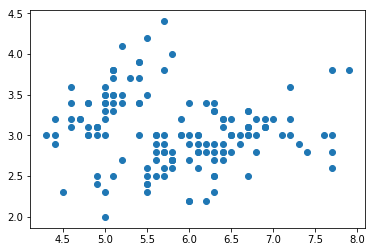

In [13]:
# Exploration of data
plt.scatter(data['SepalLength'],data['SepalWidth'])

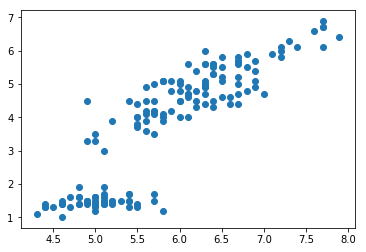

In [14]:
# Exploration of data
plt.scatter(data['SepalLength'],data['PetalLength'])

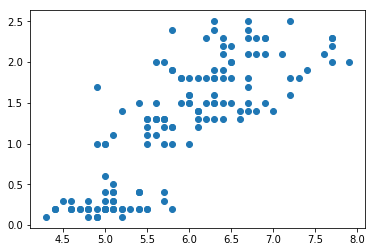

In [15]:
# Exploration of data
plt.scatter(data['SepalLength'],data['PetalWidth'])

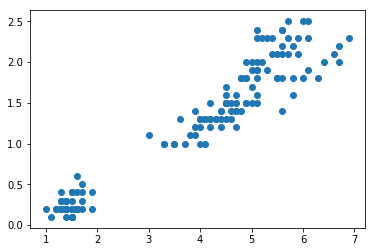

In [16]:
# Exploration of data
plt.scatter(data['PetalLength'],data['PetalWidth'])

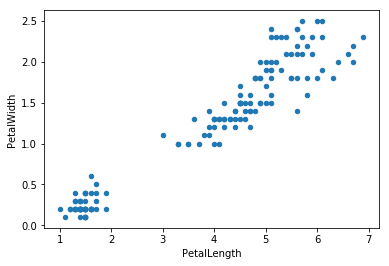

In [17]:
# Exploration of data
data.plot(kind='scatter',x='PetalLength',y='PetalWidth')

In [18]:
# Exploration of data
data[data['Class'] == 'Iris-setosa'].head(10)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


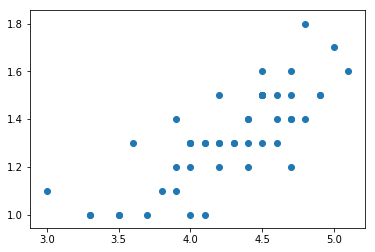

In [19]:
# Exploration of data
plt.scatter(data[data['Class'] == 'Iris-versicolor']['PetalLength'],data[data['Class'] == 'Iris-versicolor']['PetalWidth'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FE23624C88>,
      dtype=object)

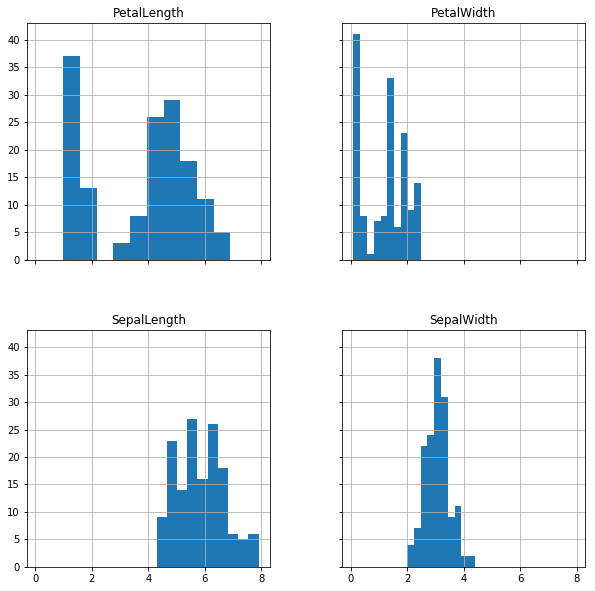

In [20]:
# Exploration of data
data.hist(column=['SepalLength','SepalWidth','PetalLength','PetalWidth'],figsize=(10,10),sharey=True,sharex=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FE2378D240>,
      dtype=object)

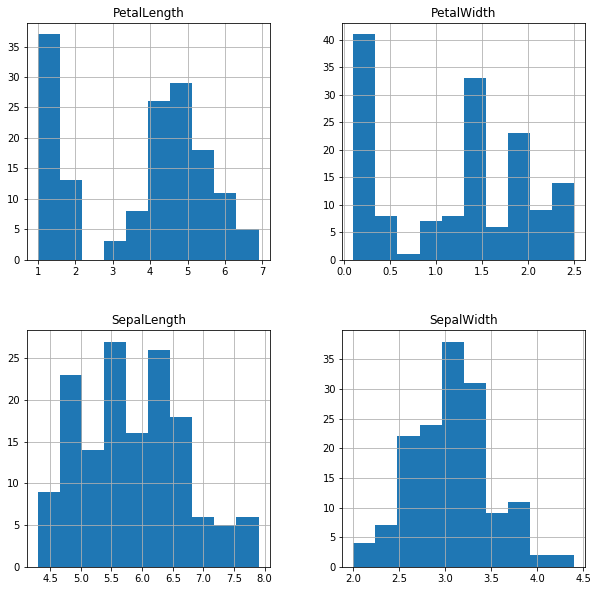

In [21]:
# Exploration of data
data.hist(column=['SepalLength','SepalWidth','PetalLength','PetalWidth'],figsize=(10,10))

In [22]:
# Starting statistical analysis of IRIS dataset
from IPython.core.display import display, HTML
display(HTML('<h1>Analyzing the ' +
             '<a href="https://en.wikipedia.org/wiki/Pearson_correlation_coefficient">' +
             'Pearson correlation coefficient</a></h1>'))

In [23]:
import scipy.stats as stats
corr = data.corr(method='pearson')

In [24]:
bool_upper_matrix = np.tril(np.ones(corr.shape)).astype(np.bool)
corr = corr.where(bool_upper_matrix)
display(corr)

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,NaN,NaN,NaN
SepalWidth,-0.109369,1.000000,NaN,NaN
PetalLength,0.871754,-0.420516,1.000000,NaN
PetalWidth,0.817954,-0.356544,0.962757,1.0


In [25]:
import pylab
import seaborn as sns

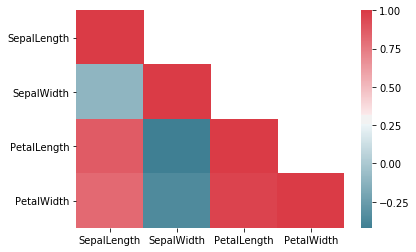

In [26]:
# Checking heatmap to feel about relationships between attributes
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

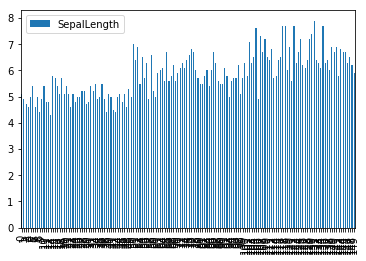

In [27]:
data[data.columns[0:1]].plot.bar()

In [28]:
data.columns[0:1]

Index(['SepalLength'], dtype='object')

SepalLength       AxesSubplot(0.125,0.536818;0.352273x0.343182)
SepalWidth     AxesSubplot(0.547727,0.536818;0.352273x0.343182)
PetalLength          AxesSubplot(0.125,0.125;0.352273x0.343182)
PetalWidth        AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

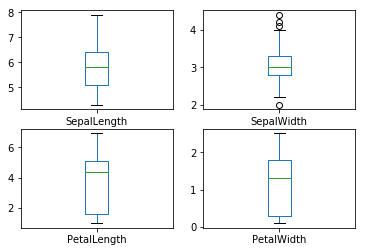

In [29]:
# Box plot of all attributes
data.plot(kind='box',subplots=True,layout=(2,2))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FE25E88EF0>,
      dtype=object)

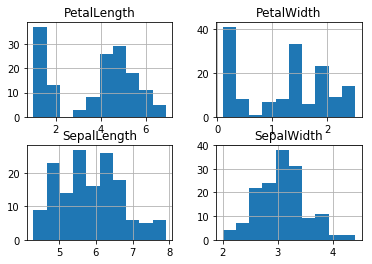

In [30]:
data.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FE25D90198>,
      dtype=object)

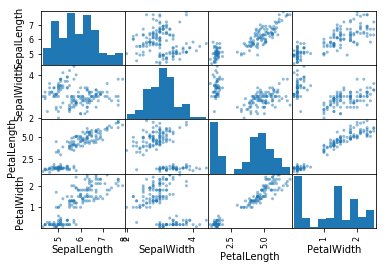

In [31]:
# Scatterplot shows relationships between attributes
pd.plotting.scatter_matrix(data)

In [32]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [33]:
# Split-out validation dataset .. Here the training data becomes validation data
array = data.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [34]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
 kfold = model_selection.KFold(n_splits=10, random_state=seed)
 cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


In [35]:
# Make predictions on validation dataset. And check for metrices of the algorithm
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30

